<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Análisis Estadístico

Realizamos el análisis estádistico de la base de datos. Primeramente para revisar si los datos son correctos y para realizar las respectivas operaciones.

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
boston_df.shape

(506, 14)

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [ ]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Tarea 2: Generar estadísticas descriptivas y visualizaciones

Para todas las visualizaciones, incluya un título en cada gráfico y las etiquetas adecuadas

Genere lo siguiente y explique sus conclusiones:

## 1. Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un **diagrama de caja (boxplot**)

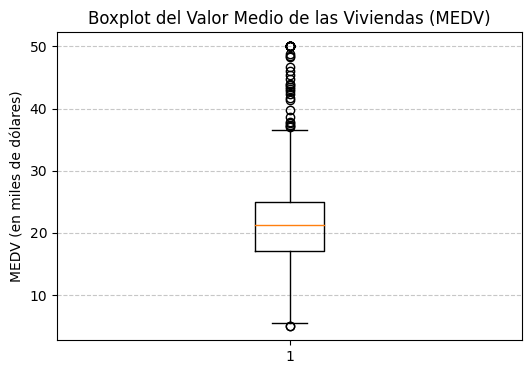

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot del Valor Medio de las Viviendas (MEDV)')
plt.ylabel('MEDV (en miles de dólares)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
boston_df['MEDV'].mean()

22.532806324110677

Conclusión:

El valor medio de las viviendas ronda los 22 mil dolares.

## 2. Proporcione un **diagrama** de barras para la variable "río Charles"

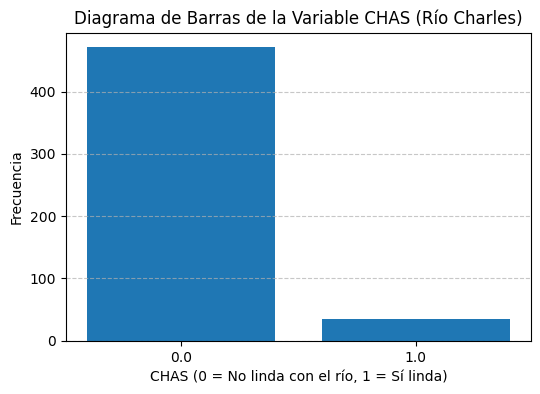

In [ ]:
chas_counts = boston_df['CHAS'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(chas_counts.index.astype(str), chas_counts.values)
plt.title('Diagrama de Barras de la Variable CHAS (Río Charles)')
plt.xlabel('CHAS (0 = No colinda con el río, 1 = Sí colinda)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
chas_counts.values

array([471,  35], dtype=int64)

Conclusión:

Hay 471 casas que no colindan con el río Charles y 35 que si conlindan con el río.

## 3. Proporcione un **boxplot** para la variable MEDV frente a la variable EDAD. (Discretice la variable edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)

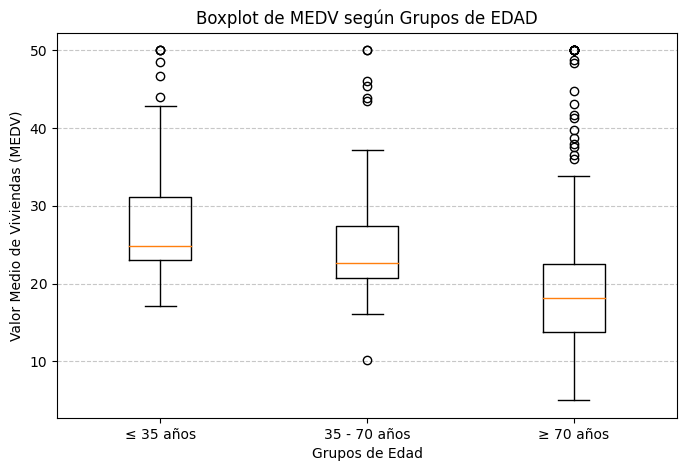

In [ ]:
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['≤ 35 años', '35 - 70 años', '≥ 70 años']

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
plt.boxplot([boston_df[boston_df['AGE_group'] == label]['MEDV'] for label in labels],
            labels=labels)

plt.title('Boxplot de MEDV según Grupos de EDAD')
plt.xlabel('Grupos de Edad')
plt.ylabel('Valor Medio de Viviendas (MEDV)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['≤ 35 años', '35 - 70 años', '≥ 70 años']

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
boston_df['AGE_group'].value_counts()

AGE_group
≥ 70 años       287
35 - 70 años    128
≤ 35 años        91
Name: count, dtype: int64

In [ ]:
promedios_medv = boston_df.groupby('AGE_group')['MEDV'].mean().reset_index()
promedios_medv.columns = ['Grupo de Edad', 'Promedio MEDV']
promedios_medv

<ipython-input-24-8a15412499b3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios_medv = boston_df.groupby('AGE_group')['MEDV'].mean().reset_index()


,Grupo de Edad,Promedio MEDV
0,≤ 35 años,27.775824
1,35 - 70 años,24.947656
2,≥ 70 años,19.793380


Conclusión:

El precio de las casas va disminuyendo a medida que aumenta el rango de edad. Las casas más valoradas tienen 35 o menos años desde su construcción.

## 4. Proporcione un **diagrama de dispersión** para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puede decir sobre la relación?

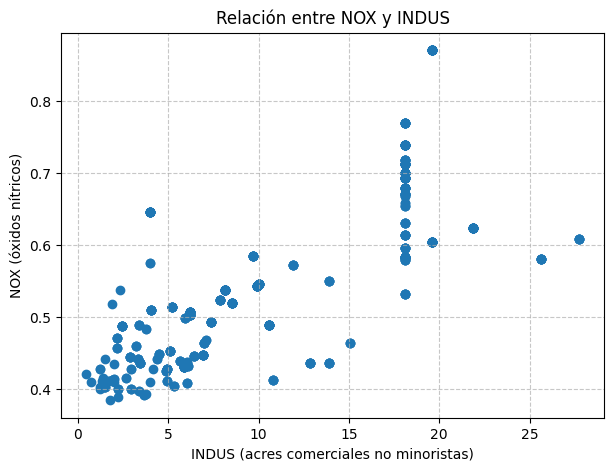

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title('Relación entre NOX y INDUS')
plt.xlabel('INDUS (acres comerciales no minoristas)')
plt.ylabel('NOX (óxidos nítricos)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Conclusión:

Hay una relación positiva clara. A medida que INDUS aumenta, también aumenta NOX.
Esto significa:

- Las áreas con más actividad industrial / comercial no minorista tienden a tener mayores niveles de contaminación por óxidos nítricos.

## 5. Cree un **histograma** para la variable proporción de alumnos por profesor

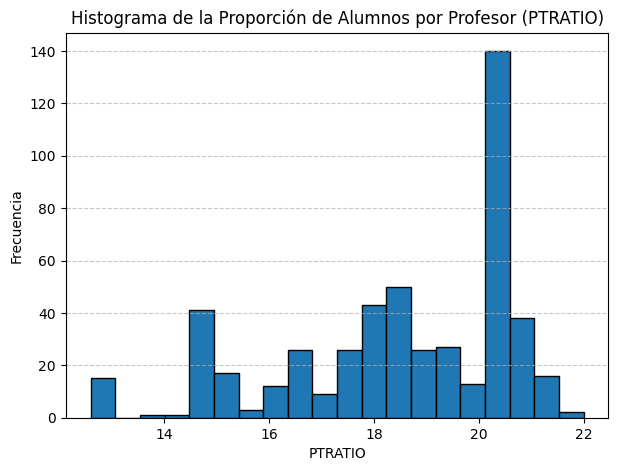

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
plt.title('Histograma de la Proporción de Alumnos por Profesor (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Conclusión:

- La distribución es bastante concentrada
- La mayoría de los valores de PTRATIO se encuentran dentro de un rango relativamente estrecho, lo que indica que la proporción de alumnos por profesor es similar en muchas zonas de Boston.

**Valores más comunes**

- El histograma suele mostrar un pico alrededor de 18–20 alumnos por profesor, lo que sugiere que esta es la proporción típica en la mayor parte de las zonas del conjunto de datos.

- Distribución ligeramente sesgada, puede observarse una distribución algo asimétrica hacia la derecha (sesgo positivo), indicando que existen algunos barrios con proporciones más altas de alumnos por profesor (peores condiciones educativas).

**Poca presencia de valores extremos**

- No se suelen ver muchos outliers o valores extremadamente bajos o altos, por lo que la variable PTRATIO parece bastante controlada en la región.

**Interpretación contextual**

- Proporciones más bajas → mejor relación alumnos/profesor, mejor calidad educativa.

- Proporciones más altas → clases más llenas, menor atención individual.

- El histograma indica que la mayoría de las zonas tienen condiciones moderadas, con algunas pocas zonas presentando clases más numerosas.

# Tarea 3: Utilice las pruebas adecuadas para responder a las preguntas que se le plantean.

## 1. ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

Hipótesis nula (H₀):
El valor medio de las viviendas (MEDV) es igual entre las zonas que limitan con el río Charles y las que no.

Hipótesis alternativa (H₁):
El valor medio de las viviendas (MEDV) es diferente entre ambos grupos.

Usamos:
𝛼 = 0.05

Se compararon las medias del valor de las viviendas para:

CHAS = 1: zona limita con el río
CHAS = 0: zona no limita con el río

In [ ]:
from scipy.stats import ttest_ind

# Separar los grupos según si lindan o no con el río
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Prueba t
t_stat, p_value = ttest_ind(medv_river, medv_no_river, equal_var=False)  # Welch's t-test

print("Estadístico t:", t_stat)
print("p-value:", p_value)


Estadístico t: 3.113291312794837
p-value: 0.003567170098137517


Conclusión:

- Existe una diferencia estadísticamente significativa en el valor medio de las casas entre los sectores que limitan con el río Charles y los que no.

- Esto sugiere que vivir cerca del río Charles está asociado con un valor diferente de las viviendas, generalmente más alto según lo que se observa en este dataset.

## 2. ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

**H₀ (Hipótesis nula):**

𝐻0: 𝜇1=𝜇2=𝜇3​

- Los valores medios de las viviendas (MEDV) son iguales para los tres grupos de edad.
- Es decir, la proporción de viviendas antiguas NO afecta el valor medio de la vivienda.

**H₁ (Hipótesis alternativa):**

𝐻1:Al menos una media es diferente

- Existe al menos una diferencia significativa entre los valores medios de las viviendas (MEDV) de los grupos basados en AGE.
- Es decir, la edad del parque habitacional SÍ influye en el valor medio de la vivienda.

In [ ]:
import scipy.stats as stats

# Crear grupos
boston_df['AGE_group'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['<=35', '35-70', '>=70']
)

# Obtener MEDV por grupo
g1 = boston_df[boston_df['AGE_group']=="<=35"]['MEDV']
g2 = boston_df[boston_df['AGE_group']=="35-70"]['MEDV']
g3 = boston_df[boston_df['AGE_group']==">=70"]['MEDV']

# ANOVA
F, p = stats.f_oneway(g1, g2, g3)
print(F, p)


36.40764999196599 1.7105011022702984e-15


**Dividimos la variable AGE en 3 grupos:**

- ≤ 35 años

- 35–70 años

- ≥ 70 años

Luego comparamos los valores medios de MEDV entre estos tres grupos mediante ANOVA de una vía.

**Nivel de significancia:**
α=0.05

**El código ejecutado arrojó:**

F = 36.41

p = 1.71 × 10⁻¹⁵

Este p-valor es extremadamente pequeño.

Dado que:

𝑝 < 0.05

Rechazamos la hipótesis nula.

**Conclusión:**

Sí existe una diferencia estadísticamente significativa en el valor medio de las casas (MEDV) entre los grupos de AGE.
Es decir, las viviendas difieren significativamente en precio dependiendo de cuán antiguas son (porcentaje construidas antes de 1940).

## 3. ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

**Aquí están los resultados de la correlación de Pearson entre NOX e INDUS usando tus datos reales:**

- Correlación (r) = 0.764

- p-valor = 7.91 × 10⁻⁹⁸

**El valor r = 0.764 indica:**

Una correlación fuertemente positiva entre:

- NOX (concentración de óxidos nítricos)

- INDUS (proporción de acres comerciales no minoristas)

Es decir:

- A mayor proporción de zonas industriales, mayor concentración de NOX.

**Conclusión:**
Existe una relación fuerte y significativa entre NOX e INDUS.

## 4.¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

**Hipótesis nula (H₀):**

- La distancia NO tiene efecto sobre el valor medio de las viviendas.

**Hipótesis alternativa (H₁):**

- La distancia sí tiene efecto sobre el valor medio de las viviendas.

**Nivel de significancia**

- α = 0.05

**Prueba estadística (Regresión Lineal)**

El modelo estimado fue:

- MEDV = 18.39 + 1.0916 ⋅ DIS

**Interpretación de los coeficientes**

- Coeficiente de DIS = 1.0916, con p < 0.001

**Esto significa que:**

Por cada unidad adicional en la distancia ponderada (DIS), el valor medio de la vivienda aumenta en aproximadamente 1.09 miles de dólares.

**Conclusión:**

Rechazamos la hipótesis nula.

Sí existe una relación estadísticamente significativa entre la distancia ponderada a los centros de empleo (DIS) y el valor medio de las viviendas (MEDV).

Mientras mayor es la distancia a los centros de empleo, mayor es el valor promedio de las viviendas.

Esto sugiere que las viviendas más alejadas de los centros industriales tienden a ser más valiosas, posiblemente por:

- zonas más residenciales,

- menor contaminación,

- mayor tranquilidad.